In [651]:
import numpy
import pandas
import matplotlib.pyplot as plt
import matplotlib
import time
from datetime import datetime
import  matplotlib.ticker as ticker
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

In [652]:
status_list = pandas.read_csv('/home/amigos/data/experiments/status_monitor/20181106_135308.txt', sep=' ', header=None,names=['time','CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8','vacuum','temperture','humidity'])

In [653]:
#日付
d = datetime.fromtimestamp(status_list['time'][0])
D = str(d.year)+'/'+str(d.month)+'/'+str(d.day)+'  '+str(d.hour+9)+':'+str(d.minute)

In [654]:
Time = (status_list['time']-status_list['time'][0])/3600
s = status_list[status_list['CH1']>0]
s = s.drop('time',axis = 1)
Time = Time[Time.index>42]
status_list = pandas.concat([Time,s], axis = 1)
status_list

,time,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,vacuum,temperture,humidity
43,0.011966,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
44,0.012244,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
45,0.012523,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
46,0.012801,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
47,0.013079,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
48,0.013357,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
49,0.013635,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
50,0.013916,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
51,0.014194,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0
52,0.014472,313.85,294.35,295.13,295.70,295.16,296.02,295.73,293.97,1.000000e-02,24.4,50.0


In [655]:
ex = status_list[status_list['CH4']<70] #温度制限

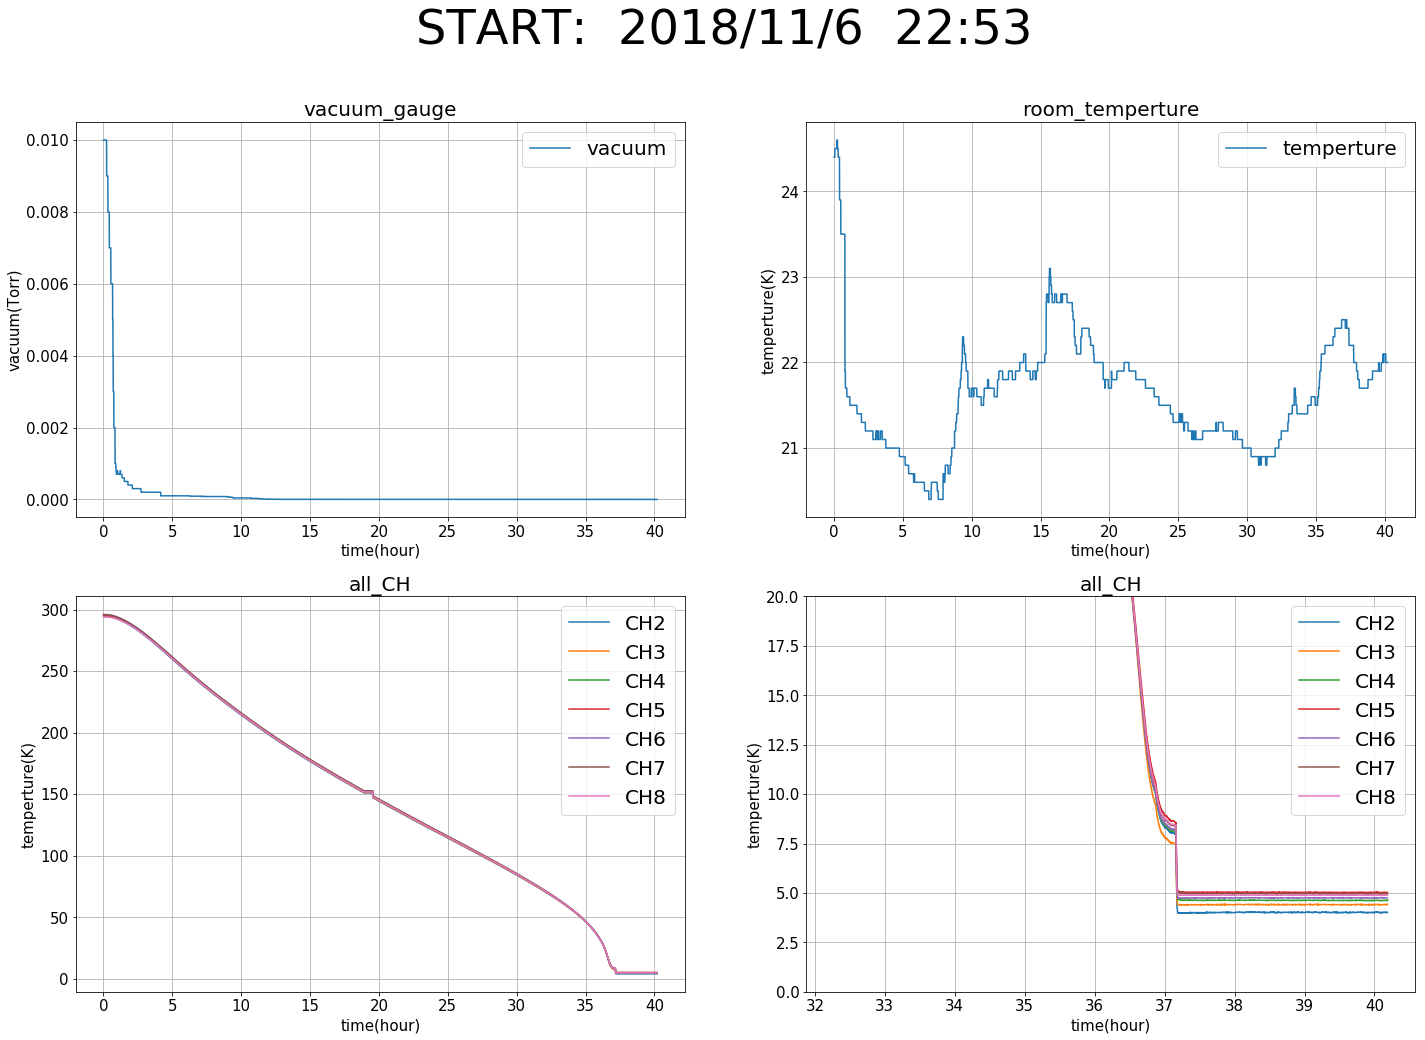

In [656]:
fig = plt.figure(figsize=(6*4, 4*4)) 

matplotlib.rcParams['font.size'] = 20

status = ['vacuum','temperture']
unit = ['(Torr)','(K)']
title = ['vacuum_gauge','room_temperture']
CH_list = ['CH2','CH3','CH4','CH5','CH6','CH7','CH8']
ax = [fig.add_subplot(2,2,i) for i in range(1,len(status)+3)]

#70K 以下制限
ex = status_list[status_list['CH4']<70]

for status, _ax , _unit, _title in zip(status, ax , unit, title):
    _ax.plot(status_list['time'], status_list[status], label = status)
    _ax.grid()
    _ax.set_xlabel('time(hour)',size = 15)
    _ax.set_ylabel(status+_unit,size = 15)
    _ax.set_title(_title,size = 20)
    _ax.legend()

ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
[ax3.plot(status_list['time'],status_list[i],label = i) for i in CH_list]
ax3.grid()
ax3.set_xlabel('time(hour)',size = 15)
ax3.set_ylabel('temperture(K)', size = 15)
ax3.set_title('all_CH',size = 20)
ax3.legend()
[ax4.plot(ex['time'],ex[i],label = i) for i in CH_list]
ax4.grid()
ax4.set_xlabel('time(hour)',size = 15)
ax4.set_ylabel('temperture(K)', size = 15)
ax4.set_ylim(0,20)
ax4.set_title('all_CH',size = 20)
ax4.legend(loc = 'upper right')
fig.suptitle( 'START:  '+D, size=48)

plt.show()